In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import random
import networkx as nx

##a)

In [ ]:
def buildSmallWorldNet(L, Z, p):
  G = nx.Graph()
  for i in range(1,L+1):
    G.add_node(i)

  for node in range(1,L+1):
    for i in range(Z+1):
      neighbor = int((node - Z/2 + i)%L)
      if neighbor == 0:
        neighbor = 20
      if neighbor != node:
        G.add_edge(node, neighbor, color='black')
  
  for i in range(int(L*Z*p/2)):
    u_node = random.randint(1, L)
    while(1):
      v_node = random.randint(1, L)
      if(u_node != v_node and v_node not in list(G.neighbors(u_node))):
        break 

    # print(u_node, v_node)
    G.add_edge(u_node, v_node, color='r')


  return G

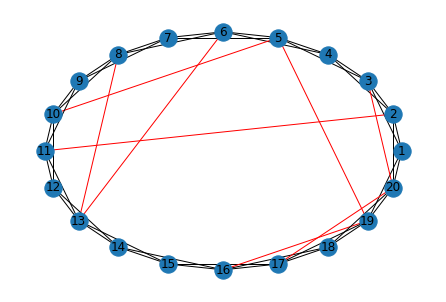

In [ ]:
G = buildSmallWorldNet(20,4,0.2)
colors = [G[u][v]['color'] for u,v in G.edges()]
nx.draw_circular(G, edge_color = colors, with_labels=True)


##b)

In [ ]:
# https://sethna.lassp.cornell.edu/StatMech/ComputerExercises/PythonSoftware/Networks.py

def FindPathLengthsFromNode(graph, node):
  l = 0
  distances = {node: 0}
  currentShell = [node]
  while(currentShell):
    nextShell = []
    for u in currentShell:
      for v in graph.neighbors(u):
        if v not in distances:
          nextShell.append(v)
          distances[v] =  l+1
    l=l+1
    currentShell = nextShell
  
  return distances


def FindAllPathLengths(graph):
  all_lenghts = {}
  for u in list(graph.nodes):
      distances = FindPathLengthsFromNode(graph, u)
      for v in distances.keys():
          all_lenghts[(min(u, v), max(u, v))] = distances[v]
  return all_lenghts


def FindAveragePathLength(graph):
    count = 0
    total = 0.
    for node in list(graph.nodes):
        distances = FindPathLengthsFromNode(graph, node)
        for node2, dist in distances.items():
            count += 1
            total += dist
    return total/count

{1: 0, 19: 1, 20: 1, 2: 1, 3: 1, 17: 2, 18: 2, 5: 2, 16: 2, 4: 2, 11: 2, 15: 3, 6: 3, 7: 3, 10: 3, 14: 3, 9: 3, 12: 3, 13: 3, 8: 4}
{(1, 1): 0, (1, 19): 1, (1, 20): 1, (1, 2): 1, (1, 3): 1, (1, 17): 2, (1, 18): 2, (1, 5): 2, (1, 16): 2, (1, 4): 2, (1, 11): 2, (1, 15): 3, (1, 6): 3, (1, 7): 3, (1, 10): 3, (1, 14): 3, (1, 9): 3, (1, 12): 3, (1, 13): 3, (1, 8): 4, (2, 2): 0, (2, 20): 1, (2, 3): 1, (2, 4): 1, (2, 11): 1, (2, 19): 2, (2, 18): 2, (2, 17): 2, (2, 5): 2, (2, 6): 2, (2, 9): 2, (2, 10): 2, (2, 12): 2, (2, 13): 2, (2, 16): 3, (2, 15): 3, (2, 7): 3, (2, 8): 3, (2, 14): 3, (3, 3): 0, (3, 4): 1, (3, 5): 1, (3, 20): 1, (3, 19): 2, (3, 11): 2, (3, 6): 2, (3, 7): 2, (3, 10): 2, (3, 18): 2, (3, 17): 2, (3, 16): 3, (3, 9): 3, (3, 12): 3, (3, 13): 3, (3, 8): 3, (3, 15): 3, (3, 14): 4, (4, 4): 0, (4, 5): 1, (4, 6): 1, (4, 20): 2, (4, 11): 2, (4, 7): 2, (4, 19): 2, (4, 10): 2, (4, 8): 2, (4, 13): 2, (4, 18): 3, (4, 17): 3, (4, 9): 3, (4, 12): 3, (4, 16): 3, (4, 14): 3, (4, 15): 3, (5, 5): 0

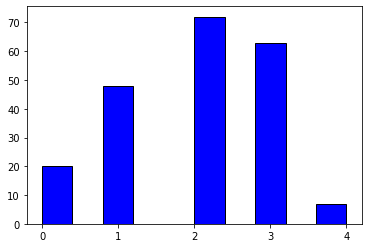

In [ ]:
dists = FindPathLengthsFromNode(G, 1)
print(dists)

paths = FindAllPathLengths(G)
print(paths)
plt.hist(paths.values(),facecolor='blue',edgecolor='black')
plt.xticks(range(max(paths.values())+1))
plt.show()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



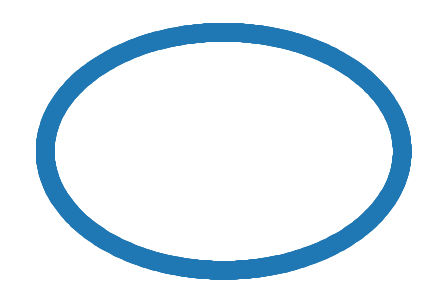

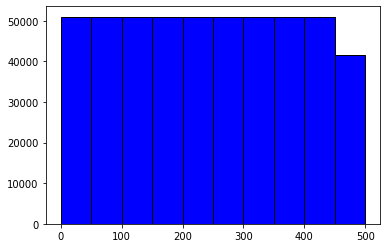

In [ ]:
G1 = buildSmallWorldNet(1000,2,0)

colors = [G1[u][v]['color'] for u,v in G1.edges()]
plt.figure(0)
nx.draw_circular(G1, edge_color = colors)

paths = FindAllPathLengths(G1)
print(paths)
plt.figure(1)
plt.hist(paths.values(),facecolor='blue',edgecolor='black')
# plt.xticks(range(max(paths.values())+1))
plt.show()


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



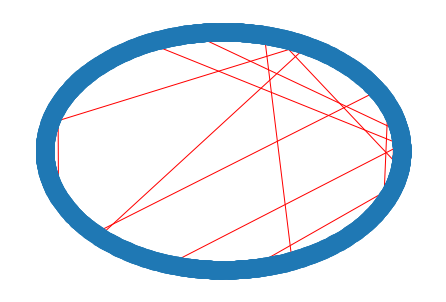

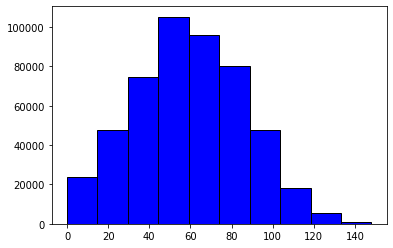

In [ ]:
G2 = buildSmallWorldNet(1000,2,0.02)

colors = [G2[u][v]['color'] for u,v in G2.edges()]
plt.figure(0)
nx.draw_circular(G2, edge_color = colors)

paths = FindAllPathLengths(G2)
print(paths)
plt.figure(1)
plt.hist(paths.values(),facecolor='blue',edgecolor='black')
# plt.xticks(range(max(paths.values())+1))
plt.show()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



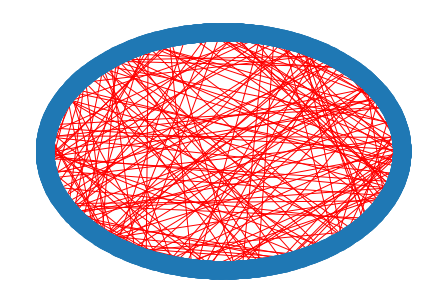

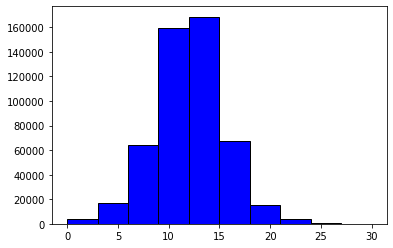

In [ ]:
G3 = buildSmallWorldNet(1000,2,0.2)

colors = [G3[u][v]['color'] for u,v in G3.edges()]
plt.figure(0)
nx.draw_circular(G3, edge_color = colors)

paths = FindAllPathLengths(G3)
print(paths)
plt.figure(1)
plt.hist(paths.values(),facecolor='blue',edgecolor='black')
# plt.xticks(range(max(paths.values())+1))
plt.show()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



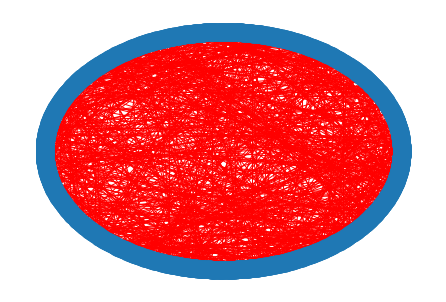

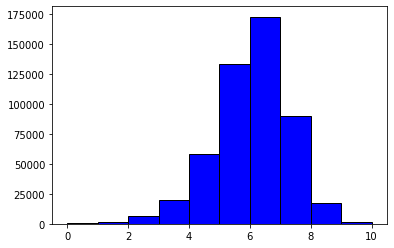

In [ ]:
# Tentativa de chegar aos 6 passos
G4 = buildSmallWorldNet(1000,2,0.9)

colors = [G4[u][v]['color'] for u,v in G4.edges()]
plt.figure(0)
nx.draw_circular(G4, edge_color = colors)

paths = FindAllPathLengths(G4)
print(paths)
plt.figure(1)
plt.hist(paths.values(),facecolor='blue',edgecolor='black')
# plt.xticks(range(max(paths.values())+1))
plt.show()

In [ ]:
# Essa é a 3 da b - tem que terminar
G5 = buildSmallWorldNet(100,2,0.1)
print(FindAveragePathLength(G5))
G5 = buildSmallWorldNet(100,2,0.1)
print(FindAveragePathLength(G5))
G5 = buildSmallWorldNet(100,2,0.1)
print(FindAveragePathLength(G5))
G5 = buildSmallWorldNet(100,2,0.1)
print(FindAveragePathLength(G5))
G5 = buildSmallWorldNet(100,2,0.1)
print(FindAveragePathLength(G5))
G5 = buildSmallWorldNet(100,2,0.1)
print(FindAveragePathLength(G5))

9.2764
9.3434
8.4716
8.0546
9.3772
9.088


##c)

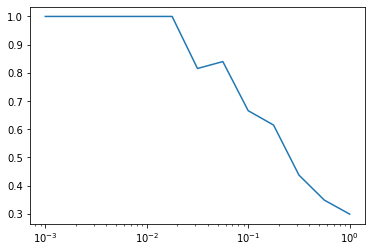

In [ ]:

def PathLengthP(parray):
    pathlengths = []
    for p in parray:
        _G = buildSmallWorldNet(50,2,p)
        avgPathLength = FindAveragePathLength(_G)
        pathlengths.append(avgPathLength)
    pathlengths = np.array(pathlengths)
    return pathlengths


def PlotMeanPathLength(parray=10.**np.arange(-3., 0.001, 0.25)):
    pathlengths = PathLengthP(parray)
    _G = buildSmallWorldNet(50,2,0)
    avgPathLengthZero = FindAveragePathLength(_G)
    pathlengths /= avgPathLengthZero
    plt.plot(parray, pathlengths)
    plt.semilogx()
    plt.show()

PlotMeanPathLength()

Quando a probabilidade de reescrever sobre uma aresta é pequena, o tamanho do caminho é o padrão.

##d)

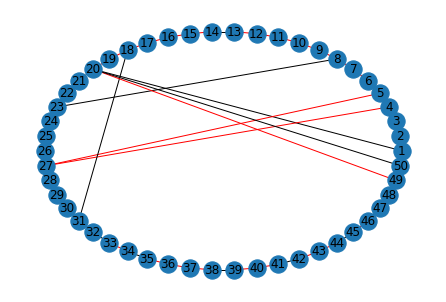

In [ ]:
_G = buildSmallWorldNet(50,2,0.1)
nx.draw_circular(_G, edge_color = colors, with_labels=True)

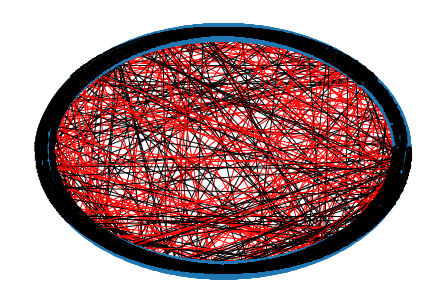

In [ ]:
_G01 = nx.watts_strogatz_graph(1000,10,0.1)
nx.draw_circular(_G01, edge_color = colors, with_labels=True)

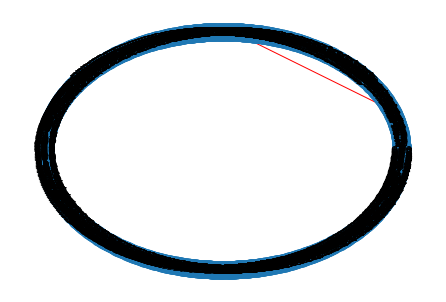

In [ ]:
_G0001 = nx.watts_strogatz_graph(1000,10,0.001)
nx.draw_circular(_G0001, edge_color = colors, with_labels=True)

O gráfico com p=0.001 parece estatisticamente mais semelhante ao nosso gráfico gerado.

In [ ]:
def PathLengthVersusShortcut(L, Z):
  parray=10.**np.arange(-10., 0.001, 1)
  print(parray)
  rMeanPath = []
  shortcutTotal = []
  for p in parray:
    _G = buildSmallWorldNet(L, Z, p)
    avgPathLength = FindAveragePathLength(_G)
    _rMeanPath = (3.14 * avgPathLength * Z) / L
    rMeanPath.append(_rMeanPath)
    _shortcut = (p * L * Z) / 2
    shortcutTotal.append(_shortcut)
  return rMeanPath, shortcutTotal

[1.e-10 1.e-09 1.e-08 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01
 1.e+00]


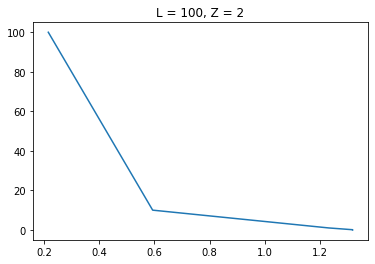

In [ ]:
_r, _s = PathLengthVersusShortcut(100, 2)
plt.plot(_r, _s)
plt.title("L = 100, Z = 2")
plt.show()

[1.e-10 1.e-09 1.e-08 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01
 1.e+00]


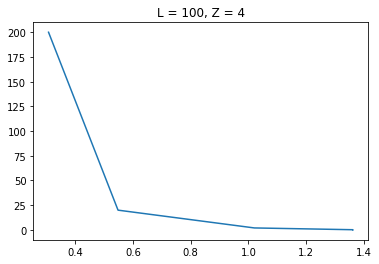

In [ ]:
_r, _s = PathLengthVersusShortcut(100, 4)
plt.plot(_r, _s)
plt.title("L = 100, Z = 4")
plt.show()

[1.e-10 1.e-09 1.e-08 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01
 1.e+00]


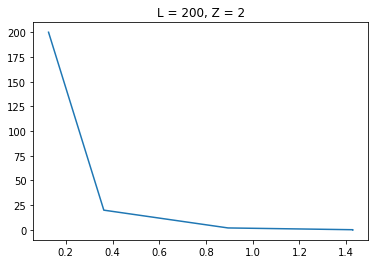

In [ ]:
_r, _s = PathLengthVersusShortcut(200, 2)
plt.plot(_r, _s)
plt.title("L = 200, Z = 2")
plt.show()

[1.e-10 1.e-09 1.e-08 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01
 1.e+00]


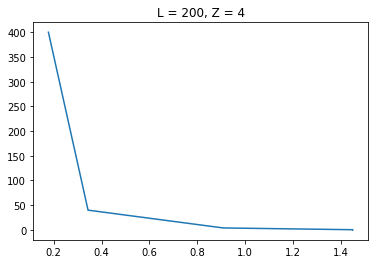

In [ ]:
_r, _s = PathLengthVersusShortcut(200, 4)
plt.plot(_r, _s)
plt.title("L = 200, Z = 4")
plt.show()

##e)


In [ ]:
with open('CA-GrQc.txt') as f:
    lines = f.readlines()

G = nx.Graph()

for line in lines:
  G.add_edge(line.split()[0], line.split()[1])

print(FindAveragePathLength(G))

6.046681512519032


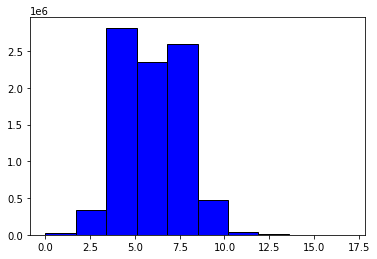

In [ ]:
paths = FindAllPathLengths(G)
plt.figure(1)
plt.hist(paths.values(),facecolor='blue',edgecolor='black')
# plt.xticks(range(max(paths.values())+1))
plt.show()